![](https://pbs.twimg.com/media/FrM6zRyWABUwUcj?format=jpg&name=4096x4096)

$\begin{array}{|c|c|} \hline
\textbf{Versão} & \textbf{Data} & \textbf{Responsável} & \textbf{Descrição} \\ \hline
\textit{1.0}             & \textit{14/mar/23}     & \textit{Luiz Barboza}         & \textit{Versāo inicial} \\ \hline
\end{array}$

# Series Temporais - Aula 1

Séries temporais são conjuntos de dados que são coletados em intervalos regulares ao longo do tempo. Esses dados podem ser coletados em qualquer período de tempo, como diariamente, semanalmente, mensalmente ou anualmente, e geralmente são dispostos em ordem cronológica.

As séries temporais podem ser usadas para analisar padrões e tendências ao longo do tempo e para prever o comportamento futuro com base em dados históricos. Elas são amplamente utilizadas em muitas áreas, como finanças, economia, marketing, meteorologia e ciência ambiental, entre outras.

As séries temporais podem ser analisadas usando técnicas estatísticas e de aprendizado de máquina, que podem ajudar a identificar padrões e tendências, bem como a prever valores futuros com base nos dados históricos.

*Nielsen, Aileen. "Análise Prática de Séries Temporais: Predição com Estatística e Aprendizado de Máquina.[Sl]." (2021)*

Uma série temporal $y_{t}$ pode ser decomposta em alguns componentes, como por exemplo:

$\begin{equation*} y_{t} = TD_{t} + sz_{t} + \varepsilon_{t} \end{equation*}$

Onde, no tempo t, $y_{t}$ é uma série temporal, $TD_{t}$ é uma tendência, $sz_{t}$ é um efeito sazonal e $\varepsilon_{t}$ é um termo de erro


![](http://analisemacro.com.br/wp-content/uploads/2018/09/decompose.png)

*WILHER, V. Decomposição de séries temporais. Análise Macro, 5 set. 2018 Disponível em:* <https://analisemacro.com.br/treinamento/decomposicao-de-series-temporais/>. 

Vamos começar as importações de fato e a trabalhar no código. Então primeiro vou importar o Pandas. Então import pandas as pd e colocamos pd que vai ser o que vou chamar. Toda vez que eu quiser chamar alguma das funções do Pandas, em vez de ter que escrever "**pandas**" ponto e o nome da função, no caso **read_csv**, vou escrever pd. Para carregar nosso banco de dados, vou chamar ele de df_total, "df" de dataframe. Ele vai ser = pd porque é uma função do Pandas, .read_csv, porque é um arquivo CSV e aí o nome do arquivo que no caso vai ser cases-brazil-states.csv.

Com df_total.**head** para vermos nosso banco de dados. Clico em "Run". Tenho a semana epidemiológica, a data, o país, o estado, cidade, novos óbitos, óbitos, novos casos e casos. Esses dados são obtidos pelos consórcios de mídia. Também tem os óbitos, "casosMS" que são as informações fornecidas pelo próprio Ministério da Saúde. Óbitos por 100 mil habitantes, casos por 100 mil habitantes, óbitos por casos, número de recuperados, suspeitos, testes e testes por 100 mil habitantes. O que podemos ver aqui? Que eu tenho um estado chamado "TOTAL". O que significa? Seriam todas essas variáveis do Brasil. Mas queremos trabalhar com os dados separados para cada estado. Então vou filtrar essas informações.



Vamos criar um novo banco de dados chamado "df" que vai ser o df_total, abro colchetes, vou selecionar a variável que nesse caso é estado. Quando ela for diferente, esse é o sinal de diferente !=, é uma exclamação e um igual, do quê? De "TOTAL". Outra coisa que eu vou fazer. 

Quando importamos não sabemos se essa variável “data” de fato está no formato de data. Ela pode ser uma string, por exemplo. Então vou forçar que ela esteja como uma data. Então df['data'], vai ser o quê? Pd.to_datetime(df_total[‘data’]), aí abro colchetes para definir qual é a variável que estamos falando, é a variável "data".


In [ ]:
import pandas as pd
df_total = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/postech_ts/main/cases-brazil-states.csv')
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [ ]:
df = df_total[df_total['estado'] != 'TOTAL']
df['data'] = pd.to_datetime(df_total['data']) 
df.head()

<ipython-input-5-706aa3c75491>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df_total['data'])


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


O que podemos ver? Para analisar tendenca podemos utilizar gráficos de linha. Cada cor representa um estado. Em primeiro lugar o estado que mais teve óbitos dentro desse período, o estado de São Paulo. Lembrando que são óbitos acumulados, então não são novos óbitos. Vamos entāo filtrar o estado de SP. E para visualizar utilizaremos a funçāo **plot**, da **matplotlib**, integrada ao pandas

<Axes: >

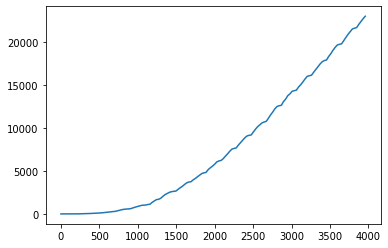

In [ ]:
sp = df[df['estado']=='SP']
sp['Obitos'].plot()

Para ter uma visualizaçāo mais flexível utilizaremos a biblioteca **seaborn**. Você que está acompanhando o nosso curso de Séries Temporais utilizando dados Primeiro vamos definir .figure(figsize=(20,8)) porque quero definir o tamanho da figura. Não quero que fique aquele padrão pequeno, "20,8". Agora vou definir um objeto "fig". Vou colocar fig =, antes de definir qual vai ser o gráfico que estou fazendo. Por quê? Porque depois, mais para frente quando quisermos, por exemplo, colocar um título, vocês vão ver que vai ficar mais fácil porque é como se tudo já ficasse armazenado nesse objeto "fig".  Vou usar o seaborn, sns.lineplot(x=’data’ , y=’Obitos’, hue=’estados’.data.df), vai ser um gráfico de linhas, e a variável "x" vai ser "data". A variável "y" vai ser "Obitos". Aí eu vou usar "hue" que é quase como se fosse uma filtragem. Então vou colocar ele em função dos estados, "estado" e aí você vai ver que quando colocarmos esse gráfico, na realidade, você vai ter vários gráficos de linha, cada um para cada estado.  E de dados eu vou colocar "df" que é o dataframe que estamos trabalhando. Então agora já vou usar aquela questão do "fig". Vou colocar fig.set_title. Ou seja, eu quero definir um título. Então vou colocar (Óbitos por estado em função do tempo). Vou definir a localização, , loc='left'. Ou seja, eu quero que ele fique à esquerda. E o fontsize=24)porque é o tamanho da fonte. Também vou definir fig.set_xlabel(). Então é o que vamos escrever no eixo "x". No eixo "x" é "Data", (‘Data’, fontsize=24) também. E fig.set_ylabel('Óbitos', fontsize=24). Clicamos em "Run" e esse é o gráfico que obtivemos.

Text(0, 0.5, 'Óbitos')

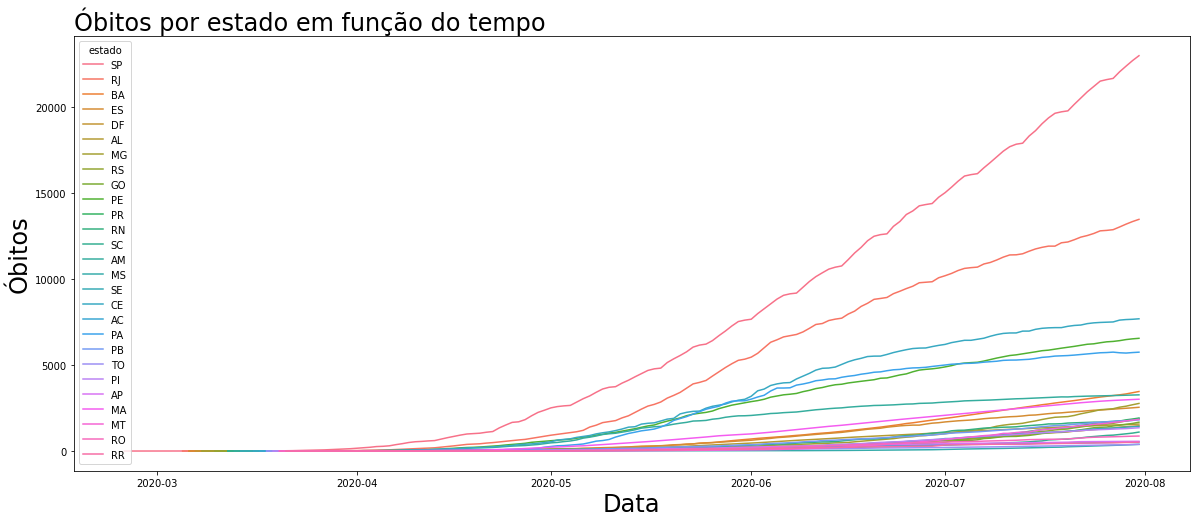

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data',y='Obitos',hue='estado',data=df)
fig.set_title('Óbitos por estado em função do tempo', loc='left',fontsize=24)
fig.set_xlabel('Data',fontsize=24)
fig.set_ylabel('Óbitos',fontsize=24)

\O que acontece? Ela cresce muito rápido e vimos vários epidemiologistas falando do crescimento exponencial. O que significa? Essa curva parece ter esse tipo de comportamento. Que é o quê? É um comportamento que é lento no início. Então podemos ver que nesse primeiro mês, até quase o segundo mês de pandemia tivemos um aumento razoavelmente lento. Óbvio que quando tratamos de óbitos nenhum número é positivo.  Mas teve um aumento mais lento. Depois, a angulação dessa curva começa a aumentar bastante. Essa é uma característica do crescimento exponencial. Então, por exemplo, se no primeiro dia se teve um óbito, aí demora três dias às vezes para que dobre esse valor e tenha dois óbitos. Só que a partir disso começa a dobrar em muito menos tempo.  Então depois, em 1 dia já dobrou de valor, aí é óbvio. Quando dobra, por exemplo, dois, ok, vai para 4. Mas quando dobra 50, aí as coisas já começam a ficar preocupantes. Tem uma informação interessante, por exemplo, que a própria OMS - Organização Mundial da Saúde alertou que os primeiros 100 mil casos da Covid-19 no mundo foram registrados em 67 dias. Ou seja, foram necessários, depois desses 67, apenas mais 11 dias para atingirmos 200 mil casos e apenas outros 4 dias para que chegássemos a 300 mil casos.  O que percebemos é que caso tivéssemos um aumento linear, esse tipo de coisa não aconteceria. Essa angulação da curva não se modificaria com esse formato exponencial. Só que isso são suposições. Estamos supondo que esse crescimento é exponencial. Mas, existem formas de determinarmos se de fato ele é exponencial. E é isso que vamos fazer. Mas antes disso precisamos filtrar. Então aqui temos todos os estados e acaba ficando com muita informação. Vamos pegar só o estado de São Paulo que aparentemente é o que mais tem óbitos. Para fazer isso vamos fazer o seguinte. Vou criar um novo banco de dados chamado df_sp de dataframe SP de São Paulo. Vai ser igual a o quê? A [df[‘estado´] == ‘SP’]. Então eu pego a variável "estado" apenas quando ela for igual a "SP".

Vale dar uma olhada nesse video para entender melhor o conceito de crescimento exponencial: https://www.youtube.com/watch?v=s-lgS-4Xqy0

In [ ]:
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


Vimos anteriormente que quando plotávamos o número de óbitos em função da data, acabávamos tendo um comportamento que parecia exponencial. Ficamos de confirmar esse comportamento. Se vocês derem uma olhada na tela, o que podemos ver é como que funciona a relação entre exponencial e logaritmo.  Quando temos, por exemplo, 10 elevado a algum número "x" com expoente "x" e aplicamos o logaritmo na base 10, vamos ter exatamente qual que é esse exponente "x". No caso da exponencial, quando temos a exponencial elevado a algum valor que é a taxa de crescimento da Covid-19, quando aplicamos o logaritmo natural, temos exatamente essa taxa de crescimento. Agora entra uma informação importante. O que vou fazer? Vou aplicar o logaritmo exatamente nos óbitos que é só a informação que precisamos. Não precisamos fazer isso na data por motivos óbvios. Não vamos entender nada se aplicarmos o logaritmo na data. É o que chamamos de gráfico monolog. Então aplicamos o logaritmo só em um dos eixos. Normalmente na variável que estamos tentando visualizar, que é o eixo "y". Em vez de eu ter aqueles números, 5 mil e não sei o quê, ele já muda essa escala no eixo "y" e o comportamento dessa curva diz para nós que o crescimento é exponencial exatamente quando tem essa curva que faz assim e não está chegando em um platô. Então se ela estivesse chegado em um platô significaria que a curva que antes era assim não está mais em crescimento. A taxa de crescimento não está crescendo. Não é o que está acontecendo aqui. O que acontece aqui é que temos uma curva que faz assim, mas ela não chega em um platô, ela continua subindo ainda que mais lentamente. Isso confirma o crescimento exponencial. O que podemos fazer é, por exemplo, colocar o hue='estado' e trocar esse banco de dados do banco de dados de São Paulo apenas para "df" que tem todos os estados. Vamos de novo em "Run" e aí ele plotou agora todos os estados. A mesma curva para todos os estados. O que podemos ver é que alguns estados, esse último, por exemplo, nos últimos meses a partir de junho começou a ter um aumento dessa taxa de crescimento. Você pode ver que a angulação dessa curva mudou bastante. Em alguns outros estados quase estamos chegando em um platô. Isso acaba falando mais para nós e é visualmente mais fácil de entender esse crescimento do que o crescimento puramente exponencial. Mas ele confirma esse comportamento.

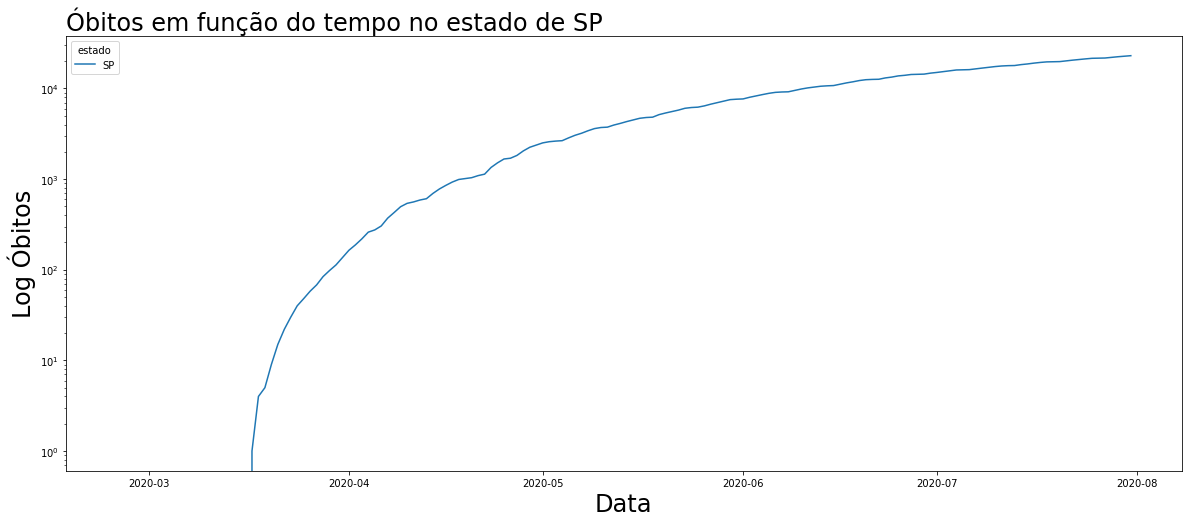

In [ ]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data',y='Obitos',hue='estado',data=df_sp)
fig.set_title('Óbitos em função do tempo no estado de SP',loc='left',fontsize=24)
fig.set_xlabel('Data',fontsize=24)
fig.set_ylabel('Log Óbitos',fontsize=24)
fig.set_yscale('log')

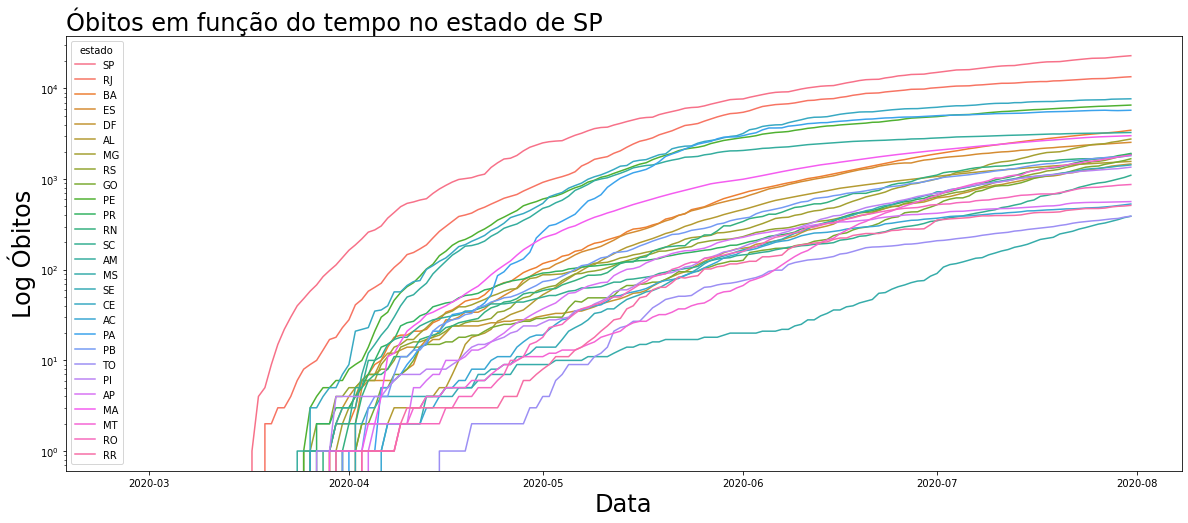

In [ ]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data',y='Obitos',hue='estado',data=df)
fig.set_title('Óbitos em função do tempo no estado de SP',loc='left',fontsize=24)
fig.set_xlabel('Data',fontsize=24)
fig.set_ylabel('Log Óbitos',fontsize=24)
fig.set_yscale('log')

Vamos falar um pouco sobre os outros dados a que temos acesso no nosso banco de dados, recuperados, suspeitos e aí eu quero plotar isso para ver o que acontece. Então vamos plotar, plt.figure(figsize=(20,8), daquele mesmo jeito. Vou criar um objeto. Só que agora vou criar um gráfico de barras e vou usar o "matplotlib". Então é fig = plt.bar. Aí um dos inputs é a variável do eixo "x", então df_sp.data. O outro input é a variável no eixo "y", então df_sp, ponto e vamos começar com os suspeitos. Aí vou colocar label='Suspeitos' porque quero colocar uma legenda depois. Eixo y (vertical) intitulado "Óbitos, Recuperados e Suspeitos no estado de SP" varia entre 0 a 350.000 com gradação de 50 mil. Eixo x (horizontal) "Data" possui valores de 2020-03 a 2020-08 com gradação de um mês. Ao centro superior há uma legenda indicando que as barras azuis correspondem a "Suspeitos", barras laranjas a "Recuperados" e barras verdes a "Óbitos". "Suspeitos" inicia em 2020-04 e segue crescente até a marca de 300.000. "Recuperados" inicia crescimento a partir de 2020-07 e "Óbitos" permanece a nível de 0 sem demonstrar crescimento. 



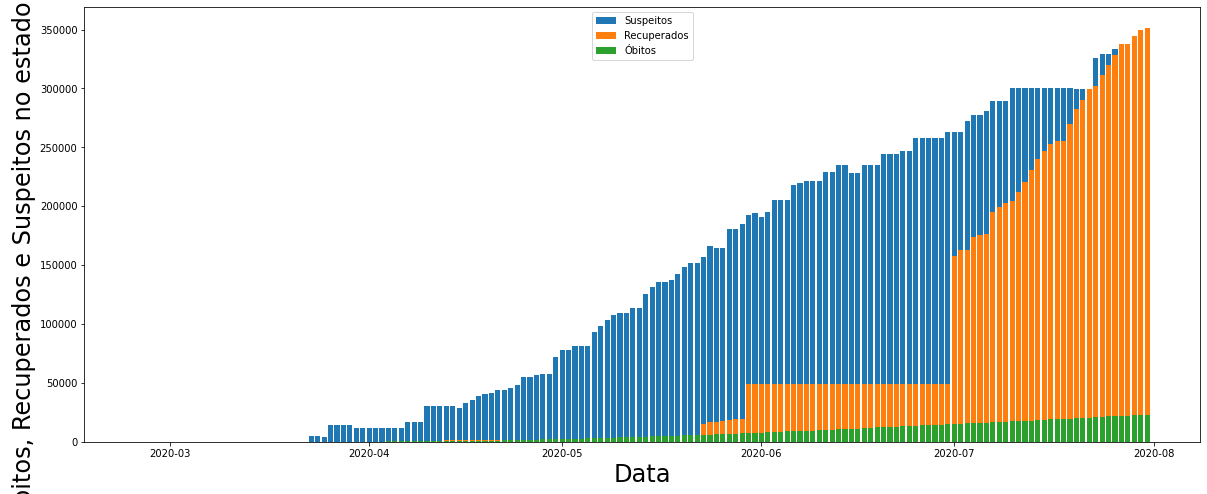

In [ ]:
plt.figure(figsize=(20,8))
fig = plt.bar(df_sp.data, df_sp.suspeitos,label='Suspeitos')
plt.bar(df_sp.data,df_sp.recuperados,label='Recuperados')
plt.bar(df_sp['data'],df_sp['Obitos'],label='Óbitos')
plt.xlabel('Data',fontsize=24)
plt.ylabel('Óbitos, Recuperados e Suspeitos no estado de SP',fontsize=24,rotation=90)
plt.legend()

Buscando informações de outros lugares, notícias, outros bancos de dados. Essa é a parte humana do data science. Um robô não conseguiria fazer isso. O ser humano tem outros conhecimentos que ele pode colocar na análise dele e por isso é tão importante estar bem informado quando procuramos fazer um trabalho como esse. Então você vai poder encontrar essa informação na atividade "Para Saber Mais". O que aconteceu foi o seguinte. As notícias mostram que no dia primeiro de julho foi o primeiro dia que a Secretária Estadual de Saúde do Estado de São Paulo começou a liberar os dados dos recuperados que não estavam internados. Até então, em maio, o que acontecia? Só as pessoas que estavam internadas e saíam da internação que eram contabilizadas como recuperadas. Então houve uma mudança de metodologia. É complicado isso, quando acontece uma mudança de metodologia ao longo de um problema, não é comum que se faça isso porque os dados acabam perdendo um pouco da sua confiabilidade. Não posso aplicar as mesmas análises que eu aplicaria a partir de julho em maio porque a metodologia de aquisição desses dados é diferente. E por outro lado, os dados dos recuperados em junho no estado de São Paulo não foram divulgados. Não sabemos se foram adquiridos e não foram divulgados ou se eles não foram computados. Isso não significa que não houve nenhum recuperado. Não é isso. Significa apenas que não temos esses dados. Isso é uma conclusão que deve ser tomada a partir do momento em que temos os dados. Como não temos, a única coisa que podemos fazer é informar que de fato não temos acesso a esses dados. O que podemos ver é exatamente que a partir de julho temos um aumento considerável dos recuperados, uma vez que os pacientes que tinham sintomas leves e sendo tratados em casa ou no hospital e não estavam em uma UTI, começaram a ser contabilizados também.


O que precisamos fazer agora é criar algumas funções para facilitar a nossa vida. Então você deve ter percebido que nos vídeos anteriores eu acabei usando as mesmas expressões várias vezes. O que podemos fazer é criar funções para que na próxima vez que eu quiser, por exemplo, plotar um gráfico de linhas ou um gráfico de barras, eu não preciso escrever aquele monte de código de novo.

In [ ]:
def plotar_linha(titulo,xlabel,ylabel,x,y,dataset,hue):
    ax = sns.lineplot(x=x, y=y, hue=hue, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo,loc='left',fontsize=20)
    ax.set_xlabel(xlabel,fontsize=20)
    ax.set_ylabel(ylabel,fontsize=20,rotation=90)
def plotar_barra(titulo,xlabel,ylabel,x,y,dataset):
    plt.figure(figsize=(20,6))
    ax = plt.bar(dataset[x],dataset[y])
    plt.title(titulo,loc='left',fontsize=20)
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20,rotation=90)

Em agosto tem dias que ultrapassa 17.500. A segunda informação relevante. Temos uma variação muito grande. Então temos essas oscilações, temos alguns dias com números muito altos, outros dias com números muito baixos. Mesmo lá na frente para o meio de julho temos um dia que supostamente houve menos de 2.500 casos por dia, apesar de no dia seguinte termos quase 17.500.

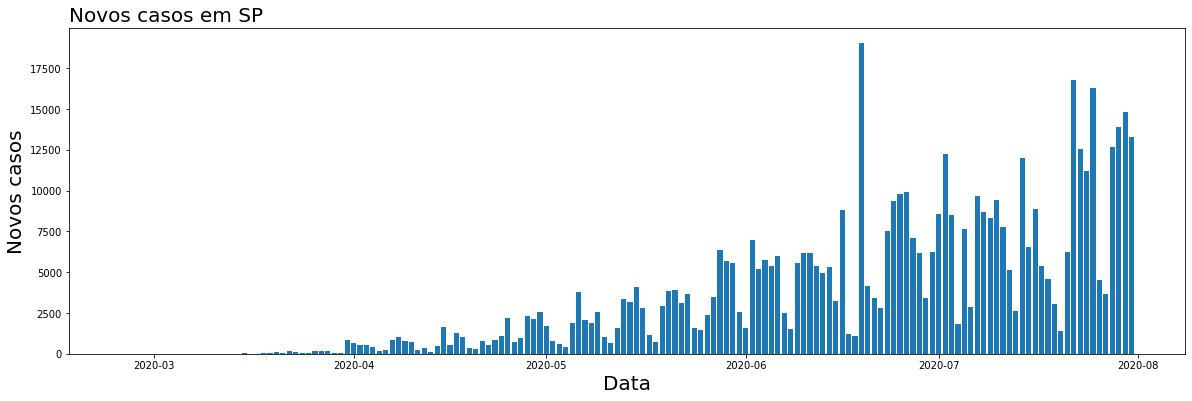

In [ ]:
plotar_barra('Novos casos em SP','Data','Novos casos','data','novosCasos',df_sp)


Mas o que é importante de se extrair daqui é que temos acelerações. Temos uma diferença entre os dias razoavelmente grande. Como podemos computar isso? O que precisamos fazer? Vou criar uma nova coluna que vai se chamar "aceleracaoCasos". Vou calcular da seguinte forma, df_sp[ ‘aceleracaoCasos’] = df_sp[ ‘novosCasos’].diff() que é a variável que estamos trabalhando e usar a função "diff". Então o que ela vai fazer? Vai calcular a diferença entre, por exemplo, o dia 10 e o dia 9. O dia 11 e o dia 10. E vou ter um vetor com essas informações porque é exatamente isso que é aceleração, é a taxa com a qual as coisas crescem. No caso, por exemplo, a aceleração de um carro é a taxa com a qual a velocidade daquele carro cresce e assim sucessivamente.

Vamos criar também a df_sp[‘aceleracaoObitos’] = df_sp['novosObitos'] e a mesma coisa com o "diff". Por fim, vamos dar uma olhada como ele criou isso. Com o "head". Clico em "Run". Beleza, olha só que interessante. O primeiro dado não temos porque não temos uma diferença. Esse é o primeiro dado. Então teríamos esse dado menos o quê? Menos nada porque não existe o dado menos 1, digamos assim. E mais para frente isso começa a aumentar. Enquanto ainda não tinha óbitos, que é o caso dessa primeira linha, não temos óbitos. Então, obviamente não vamos ter uma aceleração no número de óbitos. Na verdade, se olharmos todos esses cinco dados que estamos vendo, ainda não temos óbitos. Os óbitos são nulos. Temos casos, mas ninguém faleceu de Covid-19. Então a aceleração se mantém em zero. E uma outra coisa que podemos fazer para facilitar a visualização seria plotar essa informação. Vamos fazer o seguinte. Vou usar o mesmo plot de barras. 

E por ser notificado menos óbitos, por exemplo, se no dia 10 notificamos um número menor de óbitos do que no dia 9, quando fizermos a subtração de novos óbitos entre 10 e 9 vamos ter um valor negativo. É exatamente o que acontece com esses picos negativos. Mas se olharmos apenas para a aceleração positiva em termos de magnitude, ou seja, a altura dos picos, digamos assim, vemos que eles estão crescendo. Isso significa que a variação entre os dias está crescendo, ainda que em alguns dias essa variação seja negativa. E mais para frente vamos analisar de fato o que significa termos desacelerações ou acelerações negativas em alguns dias, porque isso acontece e porque temos essa variação tão grande na notificação de novos casos, de novos óbitos porque ambos seguem o mesmo padrão.



In [ ]:
df_sp['aceleracaoCasos'] = df_sp['novosCasos'].diff()
df_sp['aceleracaoObitos'] = df_sp['novosObitos'].diff()
df_sp.head()

<ipython-input-19-7f18082c4237>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['aceleracaoCasos'] = df_sp['novosCasos'].diff()
<ipython-input-19-7f18082c4237>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['aceleracaoObitos'] = df_sp['novosObitos'].diff()


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0


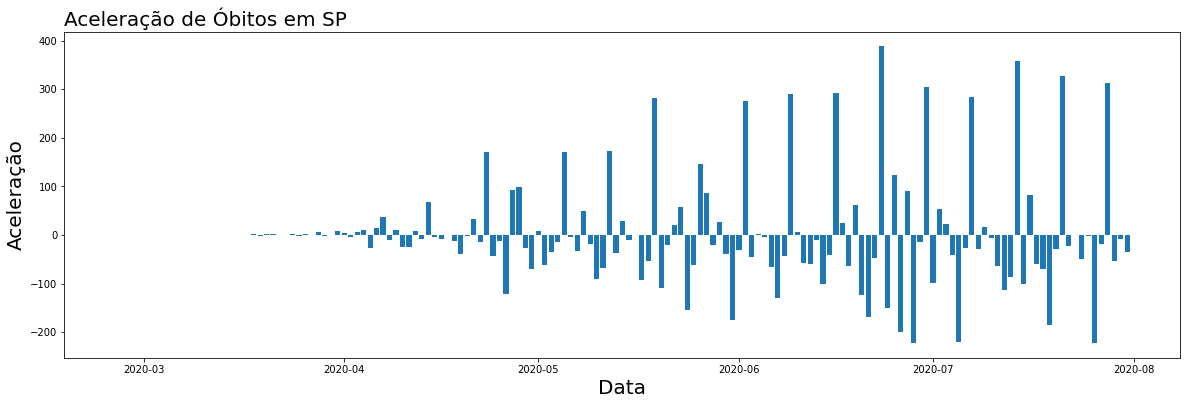

In [ ]:

plotar_barra('Aceleração de Óbitos em SP','Data','Aceleração','data','aceleracaoObitos',df_sp)

O que vimos é que alguns dos nossos dados parecem um pouco estranhos. Quando plotamos os novos casos em função da data, vimos que alguns dias têm mais casos do que outros. Essa variação é bastante significativa. Por que isso acontece? O que acontece é o seguinte. Na realidade não é que temos mais ou menos casos ou mais ou menos óbitos. O que temos é uma diminuição na divulgação. Por quê? Porque aos finais de semana, tanto os laboratórios quanto em alguns hospitais estão funcionando em ritmo de plantão. Isso significa que, por exemplo, se você faz o exame da Covid no sábado ou no domingo e o laboratório está em regime de plantão, talvez ele demore para divulgar. Talvez ele não divulgue no domingo, talvez não divulgue na segunda-feira. E é por isso que no meio da semana temos um número maior porque temos um acúmulo desses casos que não haviam sido divulgados no final de semana e nos finais de semana temos essa diminuição por isso, porque é regime de plantão, nem todos os laboratórios estão funcionando. Às vezes os exames não divulgam os resultados. Então isso é o que chamamos de sazonalidade. É quando os dados variam com alguma função temporal. Como nos casos de gripe que são maiores no inverno, temos uma sazonalidade anual dos casos de gripe, infecções respiratórias. No caso da Covid, desses dados que temos, nós temos uma sazonalidade semanal. E como que podemos fazer para resolver esse problema? Porque não tem muito como trabalharmos com essa variação. Precisamos de alguma ferramenta que possa suavizar. E essa ferramenta é utilizada, por exemplo, quando você vê o jornal e vê uma curva um pouco mais suave, é o que chamamos de média móvel. O que a média móvel vai fazer? Ela vai pegar uma janela de dados. Nesse caso, por exemplo, pode ser uma janela semanal e vai tirar a média dessa semana. E aí você vai ter uma média ao longo da semana de número de casos ou do número de óbitos. Então tem uma suavização. Você diminui esse aspecto da sazonalidade. 



In [ ]:
df_sp['mediaObitos'] = df_sp.novosObitos.rolling(window=7,center=False).mean()
df_sp['mediaObitos_14'] = df_sp.novosObitos.rolling(window=14,center=False).mean()
df_sp.head(10)

<ipython-input-21-d9344ceef08f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['mediaObitos'] = df_sp.novosObitos.rolling(window=7,center=False).mean()
<ipython-input-21-d9344ceef08f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['mediaObitos_14'] = df_sp.novosObitos.rolling(window=14,center=False).mean()


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
10,10,2020-03-01,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
12,10,2020-03-02,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
14,10,2020-03-03,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
16,10,2020-03-04,Brazil,SP,TOTAL,0,0,1,3,0,...,0.00653,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
19,10,2020-03-05,Brazil,SP,TOTAL,0,0,3,6,0,...,0.01307,0.0,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN


Gráfico de barras e linhas intitulado “Média móvel de óbitos em SP”. Eixo y (vertical) "Média" varia entre 0 a 400 com gradação de 100. Eixo x (horizontal) "Data" possui valores de 2020-03 a 2020-08 com gradação mensal. As barras plotadas em cinza oscilam gradualmente entre altas e baixas a partir de 2020-05, alcançando picos em 400 durante 2020-07 e 2020-08. Uma linha azul representa a média móvel a cada 7 dias e uma linha laranja representa a média móvel a cada 14 dias, ambos seguem crescentes até 2020-06 e seguem constantes entre 200 e 300 durante 2020-07 e 2020-08. Mas ela não é tão necessária, em especial por isso, porque a sazonalidade é semanal. Então esses spikes que temos, esses aumentos violentos, essa diminuição, talvez eles de fato digam algo relevante. Por exemplo, o que observamos é que a quantidade de novos óbitos por dia deu uma estagnada em julho e agosto. Em julho ela começou a dar uma diminuída, deu uma aumentada em agosto, mas deu uma estagnada e uma saturada. Isso provavelmente está relacionado a uma diminuição da taxa de crescimento também dos casos da Covid e consequentemente dos óbitos também.

<BarContainer object of 158 artists>

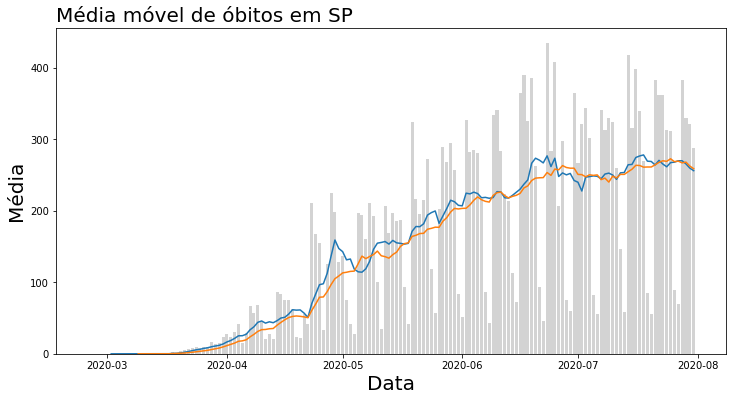

In [ ]:
plotar_linha('Média móvel de óbitos em SP','Data','Média','data','mediaObitos',df_sp,None)
plotar_linha('Média móvel de óbitos em SP','Data','Média','data','mediaObitos_14',df_sp,None)
plt.bar(df_sp['data'],df_sp['novosObitos'],color='lightgrey')

Vamos falar um pouco sobre correlação e autocorrelação. Em estatística, correlação não é uma definição única, existem várias. Mas normalmente quando estamos trabalhando com senso de dados, estamos falando da correlação "Pearson" que basicamente mede a dependência linear entre duas variáveis. Então uma variável não é linearmente dependente da outra. Isso significa que dentro da correlação temos esse range de valores. Então ela vai variar de -1 a 1 passando pelo 0. De 0 a 1 vamos ter uma correlação positiva e de 0 a -1 vamos ter uma correlação negativa. Na medida que vamos aumentando esses valores. Então a correlação nula ou sem correlação é o 0. À medida que vamos aumentando significa que essas variáveis estão mais correlacionadas. Ou seja, mais dependentes. A mesma coisa só que de maneira invertida para o caso da correlação negativa. E quando estamos falando de séries temporais não costumamos falar muito de correlação, mas sim de autocorrelação. Por quê? Porque o tempo é uma variável independente. Ele está lá correndo. Então acaba que temos só uma variável que é a variável, por exemplo, "caso" ou a variável "óbito".  

![](https://pbs.twimg.com/media/FrNe8_vWIAQQs9u?format=png&name=small)

Então para medirmos a correlação eu teria que pegar duas variáveis, duas séries temporais, por exemplo, a série temporal de casos de Covid e de óbitos para ver se elas estão correlacionadas. Quando estamos trabalhando com a mesma série temporal nós falamos de autocorrelação. E o que vamos medir é a correlação entre os períodos. Então se temos, por exemplo, a métrica de tempo sendo o mês, vou estar basicamente dando uma olhada no mês, por exemplo, de agosto e no mês de julho, depois do mês de junho e aí faço esse comparativo. E o nome que damos ao período com essa correlação é lag. Quando estivermos falando de lag é a isso que estamos nos referindo. Um exemplo. Vamos supor que temos uma série temporal com várias medições a cada hora. E aí pode ser, por exemplo, a temperatura. A temperatura hoje ao meio-dia é muito semelhante à temperatura a 24 horas atrás. Ou seja, de ontem ao meio-dia. Nesse caso o que dizemos? Que temos uma autocorrelação alta dos valores atuais com o vigésimo quarto lag. Agora se eu estiver medindo, por exemplo, a autocorrelação entre a temperatura agora e a temperatura há 6 horas atrás, aí vou estar trabalhando com a autocorrelação do período atual com o sexto lag. Então eu meço a partir do período atual que seria o valor de referência. E o período atual pode ser o valor que você escolher. Não precisa ser o agora. Mas é o que você determina como período principal. Então, um exemplo. Vamos supor que temos esse gráfico que é um gráfico de temperatura em função dos anos.



Gráfico de séries temporais. Eixo y (vertical) varia entre 0 a 30 com gradação de 5. Eixo x (horizontal) "Data" possui valores de ano entre 1981 a 1990 com gradação anual. As linhas plotadas em azul oscilam formando um padrão de pontos mínimos (abaixo de 5) no meio dos anos e pontos máximos (em torno de 25) nas viradas de ano. 
![](https://caelum-online-public.s3.amazonaws.com/1907-analise-serie-temporal-covid-19/Transcri%C3%A7%C3%A3o/Imagens/Aula3_video1_imagem1.png)

Aí queremos calcular a autocorrelação. O que temos? Gráfico de autocorrelação. Eixo y (vertical) varia entre -0.5 a 1.0 com gradação de 0.5. Eixo x (horizontal) possui valores de 0 a 3500 com gradação de 500. Ondas positivas (início em 0.5) e negativas (início em -0.5) se intercalam e vão decrescendo gradualmente. Esse gráfico que o Python fornece para nós de autocorrelação vai plotar os lags e autocorrelação dos valores em função desses lags. Então o que significa? Que a partir do lag 500, e aqui eu imagino que ele esteja trabalhando com dias, temos uma autocorrelação muito forte com o que seria ali aproximadamente de 100 e é uma autocorrelação negativa. Por quê?

Porque se voltarmos temos esse comportamento que oscila. Óbvio, temos o verão, temos o inverno, temos as estações do ano. Então dentro de um ano temos uma oscilação. E é de se esperar que a autocorrelação também tenha essa variação. Por quê? Porque se eu estiver medindo um período do verão com um período do inverno, vou ter uma autocorrelação negativa. É provável que a temperatura no verão seja maior do que a temperatura no inverno. Agora se eu estiver medindo dois períodos de verão é bem possível que a autocorrelação seja positiva e ainda mais forte. E aí começamos a ver esse decaimento em especial porque temos a questão, por exemplo, do aquecimento global. Então essa autocorrelação diminui porque as temperaturas hoje em dia já são muito diferentes do que elas eram, por exemplo, há 20 anos atrás. 

![](https://caelum-online-public.s3.amazonaws.com/1907-analise-serie-temporal-covid-19/Transcri%C3%A7%C3%A3o/Imagens/Aula3_video1_imagem2.png)




Aqui temos a mesma forma de plotar também a autocorrelação em função dos lags, só que aqui estamos olhando um período menor. Então aqui, gráfico anterior, eu tenho um período de 0 até 3.500 lags. Nesse caso, eu sei que lag é dia. Mas poderia ser outra coisa. Depende da nossa medição porque aqui a medição foi feita por dias. Aqui já deu um zoom do 0 a 50.  Então vemos que do 0 ao 50, que não dá nem dois meses, temos uma autocorrelação positiva. Só que ela vai diminuindo. Por quê? Porque à medida que o tempo vai passando nós temos uma mudança nas estações do ano, então os dias tendem a ser mais auto correlacionados. Óbvio que às vezes chega uma frente fria e muda um pouco essa situação. Mas a ideia principal é essa, que possamos entender a dependência das nossas variáveis e que também consigamos entender a dependência dos períodos temporais quando estamos falando de séries temporais.

![](https://caelum-online-public.s3.amazonaws.com/1907-analise-serie-temporal-covid-19/Transcri%C3%A7%C3%A3o/Imagens/Aula3_video1_imagem3.png)

Como você viu anteriormente, começamos a falar um pouco sobre correlação e autocorrelação. Mas agora precisamos colocar a mão na massa. Para isso vamos importar no Python uma biblioteca. É dentro do Pandas mesmo. Então from pandas.plotting import **autocorrelation_plot**.

Eixo y (vertical) “autocorrelation” varia entre -1.00 a 1.00 com gradação de 0.25. Eixo x (horizontal) “Lag” possui valores de 20 a 140 com gradação de 20. Uma linha azul parte de 1.00 em decrescente até lag 100 e então segue rota crescente até 0.00 do eixo y. E o que percebemos dentro disso? É que, por exemplo, quando estamos trabalhando com 10 dias, ou até menos, 7 dias que é uma semana, temos uma autocorrelação extremamente alta. Então ela está maior do que 0.75. Ela chega no 0.75 mais ou menos no décimo quinto dia, ou seja, duas semanas. Então em duas semanas o valor de óbitos, por exemplo, do domingo é extremamente auto correlacionado com o valor de óbitos do sábado. O que era de se esperar porque temos uma taxa razoavelmente constante de aumento e isso significa que a quantidade de dias, como é um valor acumulativo, e a quantidade de pessoas que acabaram falecendo pela Covid no domingo vai ser parecida com no sábado. Só que na medida que o tempo vai passando essa autocorrelação vai diminuindo. Normalmente quando chegamos em 0.5 já é uma correlação pequena. Qual que é o problema disso? Isso provavelmente significa que temos uma taxa alta de crescimento. E foi realmente isso no início da pandemia há alguns meses atrás, quase não tínhamos óbitos por Covid e aí tivemos um aumento muito brusco. Por isso temos essa curva. Tivemos um aumento muito brusco na taxa de casos e de crescimento de óbitos também e aí começamos a ter uma autocorrelação bem maior. Tem uma característica também interessante desses gráficos de autocorrelação é que eles também estão relacionados com a aleatoriedade das séries temporais. Por exemplo, vamos supor que tenhamos dados que não estejam auto correlacionados, ou seja, situações que não tem nada a ver, aí nesse caso não vamos ter uma autocorrelação tão alta como a que temos aqui. Temos valores beirando a 0.9 quando já passa alguns dias, aproximadamente uma semana. E aí tem toda a questão da sazonalidade também. 


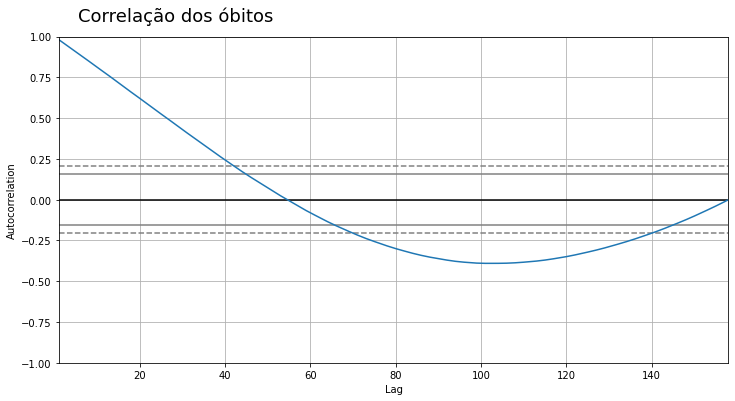

In [ ]:
from pandas.plotting import autocorrelation_plot
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos óbitos',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['Obitos'])
ax = ax

Agora vamos fazer o seguinte, vamos plotar os novos óbitos por dia porque aqui estamos falando de cumulativos e espera-se que a autocorrelação seja alta mesmo. Vamos dar uma olhada no que acontece quando plotamos com os novos óbitos. Eixo y (vertical) “autocorrelation” varia entre -1.00 a 1.00 com gradação de 0.25. Eixo x (horizontal) “Lag” possui valores de 20 a 140 com gradação de 20. Uma linha azul parte de 0.75 em decrescente e apresentando oscilação constante até lag 100 e então segue rota crescente com maior estabilidade até 0.00 do eixo y. Aquele mesmo comportamento que tínhamos devido a sazonalidade que era um comportamento oscilatório. Por quê? Porque quando chega o fim de semana se trabalha em plantão e tinha um número menor tanto de casos quanto de óbitos. Então tínhamos essa sazonalidade semanal. Ela também está presente aqui. Como vemos isso? A partir desses picos que também são oscilações. Então o que significa? Por exemplo, iniciamos em um valor alto e na medida que passa aproximadamente uma semana temos um valor muito parecido. Só que se compararmos, por exemplo, que o primeiro dia que estejamos comparando seja domingo e o próximo dia que estamos comparando seja quarta-feira, não vamos ter uma correlação tão alta. Por quê? Porque sabemos que no domingo eles liberam um número menor de óbitos do que na quarta-feira. Mas ainda assim, se analisarmos uma média percebemos que ainda temos uma autocorrelação razoavelmente alta que também começa a diminuir e inclusive a ficar negativa devido a essa taxa de aumento a partir dos dois meses. Ou seja, um lag de 60 dias.

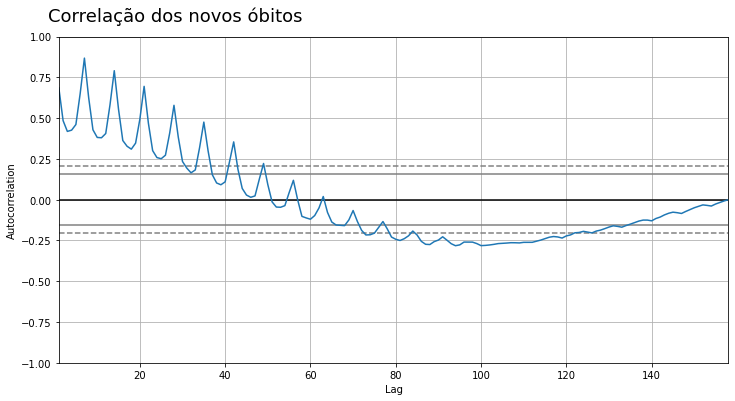

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos novos óbitos',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['novosObitos'])
ax=ax

Como já vimos anteriormente, percebemos que tem uma oscilação quando trabalhamos com novos óbitos ou com novos casos e teríamos o mesmo resultado, mesmo no "plot" de autocorrelação. Isso acontece por causa da sazonalidade. Como podemos resolver esse problema?  A média móvel que era aquilo que já tínhamos usado para analisar os gráficos de forma mais suave. Vamos tentar fazer exatamente a mesma coisa, só que com o gráfico de autocorrelação. Então vou criar mais um objeto, ax.plt.figure figsize(12,6). Vou criar um ax.suptitle(‘Correlação dos novos óbitos (média móvel)’,fontsize=18,x=0.26,y=0.95). Eixo y (vertical) “autocorrelation” varia entre -1.00 a 1.00 com gradação de 0.25. Eixo x (horizontal) “Lag” possui valores de 20 a 140 com gradação de 20. Uma linha azul parte de 1.00 em decrescente até lag 100 e então segue rota crescente até 0.00 do eixo y. Então agora não temos mais aquelas oscilações. O que percebemos é exatamente que o comportamento geral é muito parecido com o que já havíamos observado. Se eu subir um pouco no notebook, vemos que o comportamento é parecido, só que não temos mais aquelas oscilações que tínhamos antes, exatamente decorrentes da sazonalidade.

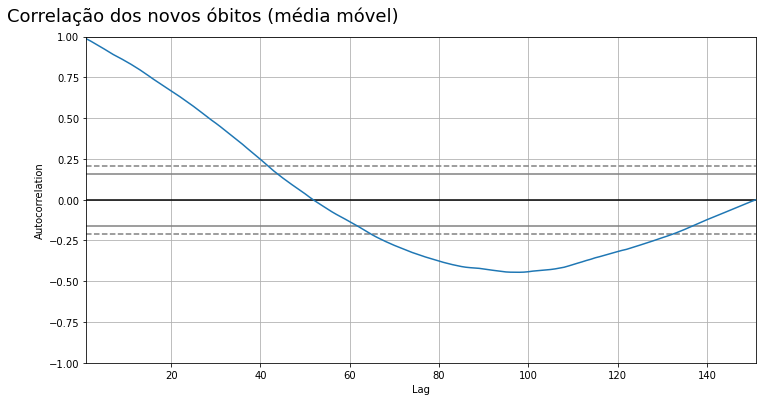

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos novos óbitos (média móvel)',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['mediaObitos'][7:])
ax=ax

E o que será que aconteceria se plotássemos a aceleração? Eixo y (vertical) “autocorrelation” varia entre -1.00 a 1.00 com gradação de 0.25. Eixo x (horizontal) “Lag” possui valores de 20 a 140 com gradação de 20. Linha plotada em azul apresenta altas e baixas constantes, iniciando em 0.75 no eixo y e seguindo em rota decrescente. Por que isso acontece? Porque tínhamos, em alguns pontos, a desaceleração que era causada pela diminuição dos dados no final de semana. Então acabava que tínhamos uma desaceleração que não era real. Isso não significa que a pandemia estava diminuindo ou a taxa de crescimento. Significava apenas que tínhamos obtido menos dados naquele dia. Já descobrimos o porquê disso que era a questão dos plantões. Da mesma forma temos, na medida que o tempo passa, uma diminuição. Por quê? O que significa? Significa que, se eu analisar o último período que tenho na série temporal com o primeiro, tenho uma autocorrelação muito baixa. Por que tenho uma autocorrelação muito baixa?

Porque tive um aumento muito grande. Tive uma taxa muito alta de aumento, inclusive vimos que era aquela curva que era assim.  Então ela não é nem uma curva linear e aí acabou perdendo um pouco das informações já que a correlação e autocorrelação dizem sobre dependências lineares e aí ficamos com um valor muito baixo porque se eu olhar para os dados de hoje eles não vão me dizer muito em comparativo com os dados de, por exemplo, 3 meses atrás porque a pandemia vem avançando, o comportamento dela avança, o formato da curva avança. Tendo ou não o achatamento da curva, isso muda e não conseguimos mais ter acesso a essa informação. O que concluímos disso? Que à medida que o tempo vai passando a autocorrelação vai diminuindo porque os eventos deixam de ser tão auto correlacionados ou dependentes.

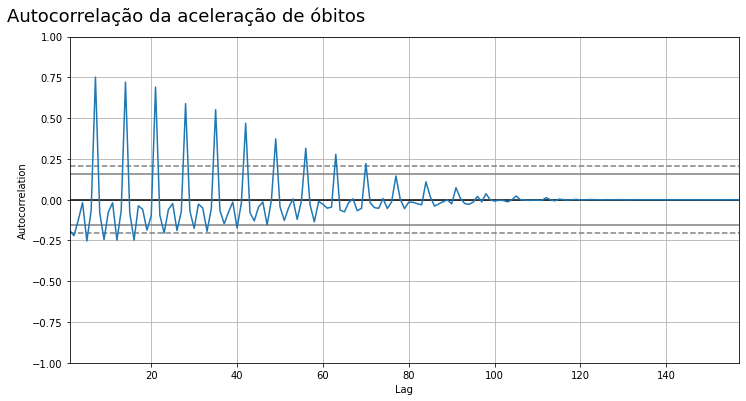

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação da aceleração de óbitos',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['aceleracaoObitos'][1:])
ax=ax

Ao longo do curso falamos bastante sobre sazonalidade, mas não definimos de fato o que é isso. Sazonalidade é quando temos uma variável que tem um comportamento muito parecido e repetitivo ao longo de um determinado período de tempo. Por exemplo, Black Friday. Então todos os anos na época da Black Friday temos um aumento de vendas. A mesma coisa acontece com vendas de passagens aéreas no natal ou casos de gripe na época do inverno. Esses três exemplos são casos de sazonalidade anual. Ou seja, temos uma autocorrelação alta entre esses períodos e essa variação se dá exatamente ao longo de um ano. No caso desses dados que temos da Covid, percebemos que temos uma autocorrelação alta ao longo da semana. Então se comparamos dados de uma quarta-feira com o da quarta-feira passada, temos um valor maior do que se compararmos o de quarta-feira com o de domingo, por exemplo. E por que isso acontece? Por aquela questão dos plantões. Temos novos casos e novos óbitos reportados em um valor menor nos finais de semana. Então essa variação nesse caso acontece semana por semana. Mas não visualizamos isso muito bem, então vamos fazer isso.

Vou criar uma variável chamada df_sp['mês'] = pd.**to_datetime**(df_sp['data']) e vou usar o Pandas, "pd.to_datetime". Naquela variável "df_sp" "data". E depois disso vou criar uma outra variável chamada “dia_da_semana” e vou usar aquela biblioteca que importamos lá no começo, a "datetime". Então df_sp[‘dia_da_semana’] = df_sp['mês'].dt.weekday_name.

In [ ]:
df_sp['mes'] = pd.to_datetime(df_sp['data'])
df_sp['dia_da_semana'] = df_sp['mes'].dt.day_name() # A FUNÇÃO weekday_name FOI SUBSTITUÍDA POR 
df_sp.head()

<ipython-input-27-eccbb7e0d6ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['mes'] = pd.to_datetime(df_sp['data'])
<ipython-input-27-eccbb7e0d6ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['dia_da_semana'] = df_sp['mes'].dt.day_name() # A FUNÇÃO weekday_name FOI SUBSTITUÍDA POR


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Tuesday
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-26,Wednesday
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2020-02-27,Thursday
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,2020-02-28,Friday
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-29,Saturday


In [ ]:
dias_traduzidos = {'Monday':'Segunda','Tuesday':'Terça','Wednesday':'Quarta',
                  'Thursday':'Quinta','Friday':'Sexta','Saturday':'Sabado',
                  'Sunday':'Domingo'}
df_sp['dia_da_semana'] = df_sp['dia_da_semana'].map(dias_traduzidos)
df_sp.head()

<ipython-input-28-ceb55998195f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['dia_da_semana'] = df_sp['dia_da_semana'].map(dias_traduzidos)


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Terça
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-26,Quarta
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2020-02-27,Quinta
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,2020-02-28,Sexta
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-29,Sabado


A primeira coisa que vamos observar é aquilo que falamos, a quantidade de novos óbitos é bem diferente dependendo dos dias da semana. Então vamos fazer o seguinte. Vou calcular a média e arredondar para cada dia da semana e vamos também transformar os dias da semana nesse novo banco de dados para ficar um banco de dados mais limpo, sem todas essas informações que não precisamos. Vamos agregar. Vou chamar de agrupados_sp = df_sp.groupby('dia_da_semana')['Obitos', 'novosObitos', 'aceleracaoObitos'].mean().round()). Vou calcular a média. Então ele vai pegar todos os dados que temos e quero saber mais ou menos ao longo de todo esse banco de dados qual é a média de casos, vou arredondar, em cada dia da semana. Por fim, vamos fazer um barplot para darmos uma olhada em como isso muda. 

In [ ]:
agrupados_sp = df_sp.groupby('dia_da_semana')['Obitos','novosObitos','aceleracaoObitos'].mean().round()
agrupados_sp['dia_da_semana'] = agrupados_sp.index
agrupados_sp = agrupados_sp.reindex(['Domingo','Segunda','Terça','Quarta','Quinta','Sexta','Sabado'])
agrupados_sp.head(7)

<ipython-input-30-5f860a76ce4e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agrupados_sp = df_sp.groupby('dia_da_semana')['Obitos','novosObitos','aceleracaoObitos'].mean().round()


,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,6846.0,60.0,-95.0,Domingo
Segunda,6887.0,41.0,-20.0,Segunda
Terça,6794.0,206.0,175.0,Terça
Quarta,6975.0,181.0,-25.0,Quarta
Quinta,7165.0,190.0,9.0,Quinta
Sexta,7342.0,177.0,-13.0,Sexta
Sabado,6786.0,155.0,-17.0,Sabado


<Axes: xlabel='dia_da_semana', ylabel='novosObitos'>

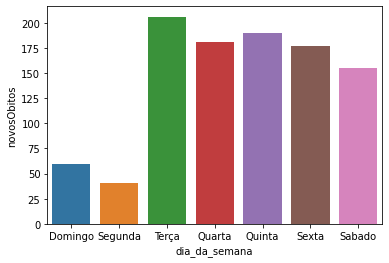

In [ ]:
sns.barplot(x=agrupados_sp['dia_da_semana'],y=agrupados_sp.novosObitos)

Anteriormente plotamos esse gráfico e vimos que temos valores razoavelmente diferentes para domingo e segunda que são os dias que eles reportam os valores de sábado e de domingo. Por exemplo, de segunda-feira temos alguns valores que não chegam a 50 novos óbitos. Enquanto na terça-feira temos valores que até ultrapassam 200. Então essa é a grande pegada da sazonalidade. Quando não percebemos que existe sazonalidade, podemos olhar dados dessa forma e supor o quê? Que a pandemia está diminuindo. Então se olho os dados de segunda-feira, sendo que sábado tinha 150, domingo 60, segunda menos 50, o que eu entendo? Que está diminuindo e que a pandemia está sob controle. Mas não é isso que os dados estão dizendo e é por isso que é tão importante investigar todas as hipóteses antes de tomar as conclusões. Inclusive no que se refere a tendências, a sazonalidades. Vamos fazer o seguinte. Vamos fazer um comparativo mês a mês da pandemia.

In [ ]:
def criar_features(df,label=None):
    df = df.copy()
    df['diasemana'] = df['mes'].dt.dayofweek
    df['mês'] = df['mes'].dt.month
    df['diamês'] = df['mes'].dt.day
    
    X = df[['diasemana','mês','diamês']]
    
    if label:
        y = df[label]
        return X,y
    return X

In [ ]:
X, y = criar_features(df_sp,label='Obitos')
df_final = pd.concat([X,y],axis=1)
df_final.head(10)

,diasemana,mês,diamês,Obitos
0,1,2,25,0
2,2,2,26,0
4,3,2,27,0
6,4,2,28,0
8,5,2,29,0
10,6,3,1,0
12,0,3,2,0
14,1,3,3,0
16,2,3,4,0
19,3,3,5,0


Anteriormente você acompanhou comigo quando estávamos fazendo essa análise de sazonalidade e criando novas variáveis. Agora vamos visualizar isso. Olha só o que temos nesse "pairplot". Temos três gráficos e por isso que antes eu estava trabalhando com "0,0" e "0,1" e "0,2" porque tenho uma matriz e preciso dizer o que estou trabalhando. Coloquei os "xlabels", "Dia da semana", "Dia do mês", "Mês" e os "Óbitos". O filtro está por cor em função do mês. E olha só o que acontece. Quando analisamos por dia da semana, então do dia 0 ao dia 6, observamos que sempre há um aumento de óbitos no meio. Então, valores maiores. E esse espaçamento também começa a aumentar na medida que os meses passam. Então aqui no início do gráfico de "Dia do mês" está bem apertado. Por quê? Porque temos quatro semanas normalmente no mês ou às vezes tem cinco dependendo de como o mês se organiza. Antes não tínhamos uma variação tão grande entre as semanas do mês. E na medida que os meses foram passando, percebemos que nessa primeira semana do mês 7, temos o quê? Uma média de 16 mil óbitos. E aí quando chegamos no final já ultrapassamos 20 mil óbitos. Então são dados acumulados e obviamente temos um aumento expressivo. A mesma coisa acontece com o dia do mês. Inicialmente nos primeiros meses não tínhamos uma diferença muito grande em relação a quantidade de óbitos à medida em que o mês ia passando. Agora fomos aumentando a inclinação da curva. O que significa? Que temos uma aceleração, temos mais óbitos por dia acontecendo. Isso é problemático. Porque diz que a pandemia não está controlada. E no caso do mês, temos a mesma coisa. Em relação aos óbitos, nos primeiros meses, o valor que se inicia o mês era muito parecido com o valor que se terminava o mês. Por outro lado, no mês 7 já temos esse afastamento. Por quê? Porque ao longo do mês temos um aumento desse acumulado de óbitos muito grande. Por quê? Porque morrem mais pessoas por dia. E aí vamos só somando esses valores. Isso mostra que de fato, apesar de termos aquela questão da sazonalidade, quando olhamos por semana podemos achar, "Será que está diminuindo? Será que aquela curva que parecia tão exponencial antes agora já atingiu um platô?". Olha, esses dados dizem para nós que não e que ainda é uma situação preocupante e que precisamos ter cuidado

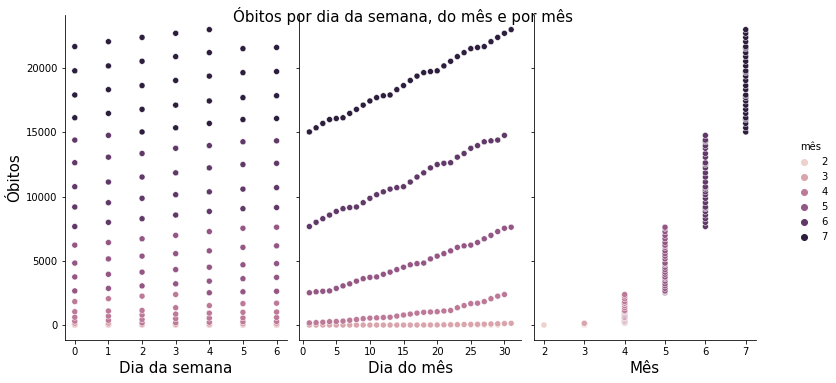

In [ ]:
g = sns.pairplot(df_final.dropna(),hue='mês',x_vars=['diasemana','diamês','mês'],y_vars='Obitos')

g.fig.set_size_inches(12,6)
g.axes[0,0].set_xlabel('Dia da semana',fontsize=15)
g.axes[0,1].set_xlabel('Dia do mês',fontsize=15)
g.axes[0,2].set_xlabel('Mês',fontsize=15)
g.axes[0,0].set_ylabel('Óbitos',fontsize=15)

plt.suptitle('Óbitos por dia da semana, do mês e por mês',fontsize=15)
plt.show()